### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
from torch import optim

### Load Fashion MNIST dataset

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [3]:
# Load the dataset
train_set = datasets.FashionMNIST('../FASHION_MNIST/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle= True)

In [4]:
# Download test set
test_set = datasets.FashionMNIST('../FASHION_MNIST/',download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

### Data description

In [5]:
image, label = next(iter(trainloader))

In [6]:
print(image.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


### Build our toy model

In [88]:
class model_no_dropout(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784,256)
        self.hidden2 = nn.Linear(256, 256)
        self.output = nn.Linear(256,10)
        
        # Activation function
        self.act = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1)
        
    def forward(self,x):
        
        x = self.act(self.hidden1(x))
        x = self.act(self.hidden2(x))
        x = self.output(x)
        
        return self.softmax(x)

In [89]:
Model_0 = model_no_dropout()

In [90]:
# Test the forward pass
test0 = image.view((len(image), -1))

In [91]:
print(test0.shape)

torch.Size([64, 784])


In [92]:
print(Model_0.forward(test0)[0])

tensor([-2.3976, -2.2256, -2.2479, -2.3041, -2.4151, -2.3964, -2.2563, -2.3572,
        -2.1925, -2.2621], grad_fn=<SelectBackward>)


In [93]:
# Define a loss function 
criterion = nn.NLLLoss()

In [94]:
# Define simple optimizers
optimizer = optim.SGD(Model_0.parameters(), lr = 0.01)

In [95]:
# Define number of epochs
n_epochs = 30

In [96]:
# Save the losses here
train_loss_0 = []
test_loss_0 = []

### Training the model

In [97]:
for i in range(n_epochs):
    
        # To evaluate the mean loss for each epochs
        running_loss = 0
        
        for images, labels in trainloader:
            
            # Reshape the image for training 
            images = images.view(len(images), -1)
            
            # Clear the gradient
            optimizer.zero_grad()
            
            # Feedforward
            y_feed = Model_0.forward(images)
            
            # Calculate loss
            loss = criterion(y_feed, labels)
            
            # Calculate the gradient
            loss.backward()
            
            # update the weights
            optimizer.step()
            
            running_loss += loss.item()
        else:
            
            # Evaluate test set
            with torch.no_grad():
                
                running_tloss = 0
                
                # Loop over test data 
                for imtest, labtest in testloader:
                    
                    # Reshape the images
                    imtest = imtest.view(len(imtest), -1)
                    
                    # Forward the test data
                    ypred = Model_0(imtest)
                    
                    # Calculate loss
                    tloss = criterion(ypred, labtest)
                    
                    running_tloss += tloss.item()
                
                
                print('epoch: %d tr_loss: %.5f test_loss: %.5f'%(i, running_loss/len(trainloader), running_tloss/len(testloader)))
            
            train_loss_0.append(running_loss/len(trainloader))
            test_loss_0.append(running_tloss/len(testloader))
            
            # Back to training 
            Model_0.train()

epoch: 0 tr_loss: 0.94413 test_loss: 0.63310
epoch: 1 tr_loss: 0.53504 test_loss: 0.52006
epoch: 2 tr_loss: 0.47470 test_loss: 0.48584
epoch: 3 tr_loss: 0.44365 test_loss: 0.51244
epoch: 4 tr_loss: 0.42153 test_loss: 0.45004
epoch: 5 tr_loss: 0.40547 test_loss: 0.42870
epoch: 6 tr_loss: 0.39076 test_loss: 0.43065
epoch: 7 tr_loss: 0.37931 test_loss: 0.40913
epoch: 8 tr_loss: 0.36894 test_loss: 0.41016
epoch: 9 tr_loss: 0.35945 test_loss: 0.40144
epoch: 10 tr_loss: 0.35032 test_loss: 0.40986
epoch: 11 tr_loss: 0.34294 test_loss: 0.38464
epoch: 12 tr_loss: 0.33527 test_loss: 0.38285
epoch: 13 tr_loss: 0.32822 test_loss: 0.38982
epoch: 14 tr_loss: 0.32233 test_loss: 0.36633
epoch: 15 tr_loss: 0.31575 test_loss: 0.37724
epoch: 16 tr_loss: 0.30993 test_loss: 0.36775
epoch: 17 tr_loss: 0.30411 test_loss: 0.37043
epoch: 18 tr_loss: 0.29841 test_loss: 0.35961
epoch: 19 tr_loss: 0.29370 test_loss: 0.35498
epoch: 20 tr_loss: 0.28909 test_loss: 0.37858
epoch: 21 tr_loss: 0.28365 test_loss: 0.3572

In [98]:
# Model with dropout
class model_with_dropout(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784,256)
        self.hidden2 = nn.Linear(256, 256)
        self.output = nn.Linear(256,10)
        
        # Activation function
        self.act = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1)
        self.drop = nn.Dropout(0.5)
        
    def forward(self,x):
        
        x = self.drop(self.act(self.hidden1(x)))
        x = self.drop(self.act(self.hidden2(x)))
        x = self.output(x)
        
        return self.softmax(x)

In [99]:
Model_1 = model_with_dropout()

In [100]:
train_loss_1 = []
test_loss_1 = []

In [101]:
# Define simple optimizers
optimizer = optim.SGD(Model_1.parameters(), lr = 0.01)

In [102]:
for i in range(n_epochs):
    
        # To evaluate the mean loss for each epochs
        running_loss = 0
        
        for images, labels in trainloader:
            
            # Reshape the image for training 
            images = images.view(len(images), -1)
            
            # Clear the gradient
            optimizer.zero_grad()
            
            # Feedforward
            y_feed = Model_1.forward(images)
            
            # Calculate loss
            loss = criterion(y_feed, labels)
            
            # Calculate the gradient
            loss.backward()
            
            # update the weights
            optimizer.step()
            
            running_loss += loss.item()
        else:
            
            # Evaluate test set
            with torch.no_grad():
                
                running_tloss = 0
                
                # Loop over test data 
                for imtest, labtest in testloader:
                    
                    # Reshape the images
                    imtest = imtest.view(len(imtest), -1)
                    
                    # Forward the test data
                    ypred = Model_1(imtest)
                    
                    # Calculate loss
                    tloss = criterion(ypred, labtest)
                    
                    running_tloss += tloss.item()
                
                
                print('epoch: %d tr_loss: %.5f test_loss: %.5f'%(i, running_loss/len(trainloader), running_tloss/len(testloader)))
            
            train_loss_1.append(running_loss/len(trainloader))
            test_loss_1.append(running_tloss/len(testloader))
            
            # Back to training 
            Model_1.train()

epoch: 0 tr_loss: 1.19227 test_loss: 0.79244
epoch: 1 tr_loss: 0.70069 test_loss: 0.65790
epoch: 2 tr_loss: 0.61192 test_loss: 0.61003
epoch: 3 tr_loss: 0.55990 test_loss: 0.56407
epoch: 4 tr_loss: 0.52383 test_loss: 0.54549
epoch: 5 tr_loss: 0.50137 test_loss: 0.52418
epoch: 6 tr_loss: 0.48291 test_loss: 0.50750
epoch: 7 tr_loss: 0.46805 test_loss: 0.49216
epoch: 8 tr_loss: 0.45517 test_loss: 0.49054
epoch: 9 tr_loss: 0.44564 test_loss: 0.47961
epoch: 10 tr_loss: 0.43397 test_loss: 0.47138
epoch: 11 tr_loss: 0.42527 test_loss: 0.46089
epoch: 12 tr_loss: 0.41632 test_loss: 0.45099
epoch: 13 tr_loss: 0.40970 test_loss: 0.45238
epoch: 14 tr_loss: 0.40349 test_loss: 0.44145
epoch: 15 tr_loss: 0.39736 test_loss: 0.44556
epoch: 16 tr_loss: 0.39325 test_loss: 0.44343
epoch: 17 tr_loss: 0.38470 test_loss: 0.43477
epoch: 18 tr_loss: 0.38372 test_loss: 0.43434
epoch: 19 tr_loss: 0.37637 test_loss: 0.42601
epoch: 20 tr_loss: 0.37157 test_loss: 0.42692
epoch: 21 tr_loss: 0.36998 test_loss: 0.4162

In [103]:
x = np.arange(n_epochs)

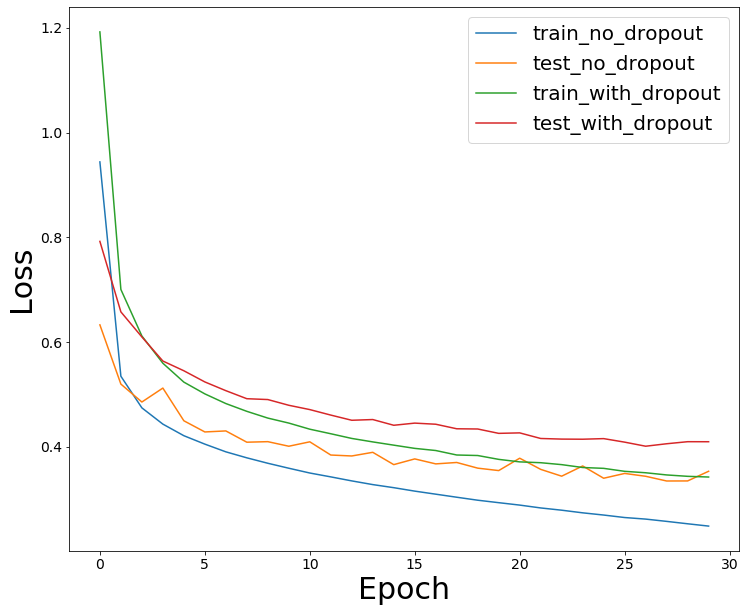

In [104]:
### Visualize the result 
fig = plt.figure(figsize = [12,10])
ax = fig.add_subplot(1,1,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Epoch', fontsize= 30)
plt.ylabel('Loss', fontsize = 30)
ax.plot(x, train_loss_0, label = 'train_no_dropout')
ax.plot(x, test_loss_0, label = 'test_no_dropout')
ax.plot(x, train_loss_1, label = 'train_with_dropout')
ax.plot(x, test_loss_1, label = 'test_with_dropout')
plt.legend(fontsize = 20)